In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
os.environ['HUGGINGFACE_API_KEY'] = os.getenv('HUGGINGFACE_API_KEY')

In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="qwen/qwen3-32b")

e:\projects\agentic\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
llm.invoke("Hello")

AIMessage(content='<think>\nOkay, the user said "Hello". I need to respond appropriately. Since it\'s a greeting, I should reply with a friendly greeting in return. Maybe ask how they\'re doing or offer assistance. Let me make sure the tone is welcoming and helpful. I\'ll go with "Hello! How can I assist you today?" That should cover it.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 9, 'total_tokens': 93, 'completion_time': 0.147142858, 'completion_tokens_details': None, 'prompt_time': 0.000265056, 'prompt_tokens_details': None, 'queue_time': 0.054970923, 'total_time': 0.147407914}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c23cc-41fb-7a21-b4b6-2b4c6224ccfe-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 9, 'output_tok

In [4]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [5]:
url = "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [6]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader(url)
data = loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [7]:
data

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [8]:
data[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [ ]:
data[0].metadata["title"]

"LLM Powered Autonomous Agents | Lil'Log"

In [ ]:
data[0].metadata["description"]

'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model 

In [ ]:
data[0].page_content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The

In [ ]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"
]

In [ ]:
docs = [WebBaseLoader(url).load() for url in urls]

In [ ]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [ ]:
doc_list = [item for sublist in docs for item in sublist]

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)


In [ ]:
doc_splits = text_splitter.split_documents(doc_list)

In [ ]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [ ]:
from langchain_community.vectorstores import Chroma

In [ ]:
db = Chroma.from_documents(doc_splits, embeddings,collection_name="rag-chroma")

In [ ]:
retriever = db.as_retriever()

In [ ]:
retriever.invoke("What is a agent and prompt?")

[Document(metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utiliz

## Creating a retriever tool

In [ ]:
from langchain_core.tools.retriever import create_retriever_tool

### first paramter of create_retriever_tool 
        -> retriever_name
        -> name of the tool
        -> description of the tool

In [ ]:
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_blog_post",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
)

In [ ]:
tools = [retriever_tool]

In [ ]:
from langgraph.prebuilt import ToolNode

### Created a retriever node

In [ ]:
retriever_node = ToolNode(tools)

In [ ]:
from typing import Annotated, Sequence, TypedDict
from langgraph.graph.message import BaseMessage, add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [ ]:
from langchain_core.prompts import PromptTemplate

In [ ]:
def llm_decision_maker(state: AgentState):
    print("---call llm decision maker")
    message = state["messages"]

    if len(message) > 1:
        last_message = message[-1]
        question = last_message.content
        prompt = PromptTemplate(
            template="""
            You are a helpful assistant.
            Question: {question}
            """,
            input_variables=["question"],
        )
        chain = prompt | llm
        response = chain.invoke({"question": question})
        return {"messages": message + [response]}
    else:
        llm_with_tool = llm.bind_tools(tools)
        response = llm_with_tool.invoke(message)
        return {"messages": [response]}


In [ ]:
from pydantic import BaseModel, Field
class grade(BaseModel):
    binary_score: str = Field(description="Relevance score 'yes' or 'no'")

In [ ]:
def grade_documents(state: AgentState):
    llm_with_structured_output = llm.with_structured_output(grade)
    prompt = PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )

    chain = prompt | llm_with_structured_output
    message = state["messages"]
    last_message = message[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question":question,"contet":docs})
    score = scored_result.binary_score

    if score == "yes":
        print("-----Descison Docs are relevant------")
        return "generator"
    else:
        print("------Descison Docs are not relevant------")
        return "rewriter"


In [ ]:
from langsmith import Client

client = Client()
prompt = client.pull_prompt("rlm/rag-prompt")

In [ ]:
from typing import Literal
#we use it for type hinting

In [ ]:
def generate(state: AgentState):
    pass

In [ ]:
def rewrite(state: AgentState):
    pass


In [ ]:
from langgraph.graph import END, START, StateGraph


In [ ]:
workflow = StateGraph(AgentState)

In [ ]:
workflow.add_node("llm decision maker", llm_decision_maker)
workflow.add_node("vector retriever", retriever_node)
workflow.add_node("query rewriter", rewrite)
workflow.add_node("output generator", generate)

In [ ]:
workflow.add_edge(START, "llm decision maker")

In [ ]:
from langgraph.prebuilt import tools_condition

In [ ]:
workflow.add_conditional_edges(
    "llm decision maker",
    tools_condition,
    {
        "tools": "vector retriever",
        END : END,
    },
)

In [ ]:
workflow.add_conditional_edges(
    "vector retriever",
    grade_documents,
    {   "generator": "output generator",
        "rewriter": "query rewriter"
    },
)

In [ ]:
workflow.add_edge("output generator", END)

In [ ]:
workflow.add_edge("query rewriter", "llm decision maker")

In [ ]:
app = workflow.compile()

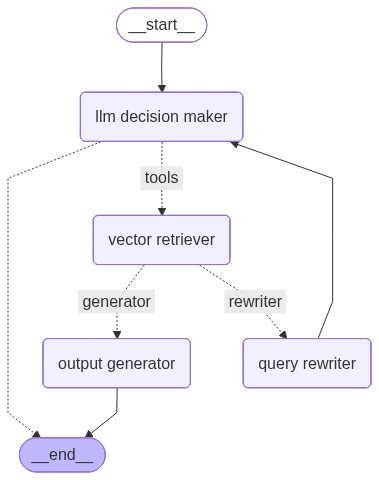

In [ ]:
app